In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from snowflakeManager import SnowflakeManager

In [8]:
sm = SnowflakeManager()

In [9]:
df = sm.fetch_selling_data()

Error connecting to Snowflake: 250001 (08001): Failed to connect to DB: vua39895.east-us-2.azure.snowflakecomputing.com:443. JWT token is invalid. [56281485-2078-4185-bf51-cb3b60ee40f6]


DatabaseError: 250001 (08001): Failed to connect to DB: vua39895.east-us-2.azure.snowflakecomputing.com:443. JWT token is invalid. [56281485-2078-4185-bf51-cb3b60ee40f6]

In [101]:
df.isnull().sum()

COD_CUPOM                          0
COD_CLIENTE                      178
CLIENTE_FISICO_JURIDICO        10051
SEXO_CLIENTE                  103541
DTNASCIMENTO_CLIENTE         1078012
COD_SKU                            0
SKU                                0
CATEGORIA_SKU                      0
SUBCATEGORIA_SKU                   0
COD_LOJA                           0
UF_CIDADE                          0
COD_CIDADE                         0
NOME_CIDADE                        0
DATA_CUPOM                         0
UNIDADES                           0
IDENTIFICADOR_PROMOCIONAL    6735816
PRECO_REGULAR                      0
TOTAL_DESCONTO                    73
TOTAL_BRUTO                        0
TOTAL_LIQUIDO                      0
dtype: int64

In [ ]:
print(sm.run_query("SELECT GET_DDL('TABLE', 'PUC_VENDAS');")[0][0])

In [34]:
df.head(5)

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
0,276578,22216869.0,Pessoa Física,F,1984-09-29,10034069,EPISOL SMART FACIAL COLOR FPS50 40ML,DERMO-COSMETICOS,DERMO-COSMETICOS,1150,RS,80400,PORTO ALEGRE,2024-06-13 18:00:52.850,1.0,100335828.0,94.90,20.00,94.90,74.90
1,276578,22216869.0,Pessoa Física,F,1984-09-29,10029566,DICLOF SODICO 50MG 20CP GEN BELFAR,MEDICAMENTOS,GENERICOS,1150,RS,80400,PORTO ALEGRE,2024-06-13 18:00:52.850,1.0,100327146.0,31.63,16.73,31.63,14.90
2,710651,22216870.0,Pessoa Física,F,1971-01-23,10090254,HIDROCLOROTIAZIDA 25,MEDICAMENTOS,GENERICOS,500,RS,80400,PORTO ALEGRE,2024-05-06 19:08:58.258,1.0,NaN,9.48,0.00,9.48,9.48
3,727805,22216870.0,Pessoa Física,F,1971-01-23,10101757,TORANTE 100ML XPE MOMENTA,MEDICAMENTOS,REFERENCIA ONEROSOS,500,RS,80400,PORTO ALEGRE,2024-06-30 09:38:39.377,1.0,NaN,61.51,7.38,61.51,54.13
4,682109,22216870.0,Pessoa Física,F,1971-01-23,12352,CETOCONAZOL CR 30G G,MEDICAMENTOS,GENERICOS OTC/MIP,500,RS,80400,PORTO ALEGRE,2024-01-04 19:41:55.000,1.0,100268022.0,27.75,13.46,27.75,14.29


Observing Duplicate Rows: Does this indicate multiple purchases by the same customer in one transaction or a data entry error?

In [ ]:
df[df.duplicated(keep=False)]

---

- **UF_CIDADE**: The column contains a constant value `"RS"` across all entries.
- **COD_CIDADE**: This column consistently holds the value `"80400"`.
- **NOME_CIDADE**: Every entry in this column is `"PORTO ALEGRE"`.
- **SEXO_CLIENTE**: This column has `103,541` missing values, accounting for `1.1%` of the total data. 4839845 are M and 4327650 are F. 
- **IDENTIFICADOR_PROMOCIONAL**: A significant portion of this column is missing, with `6,735,816` missing values, representing `72.7%` of the data.
- **COD_CLIENTE**: has 1042842 products registered to COD_CLIENTE=0.
- *DTNASCIMENTO_CLIENTE:  1111-11-11 -> 59 values | 1598-01-20 -> 2 values | 1198-04-17 -> 2 values
- *SKU: There are 984 itens that were sold only once.
- *CLIENTE_FISICO_JURIDICO: Vast amount of "Pessoa Física". It was expected. null=Pessoa jurídica e/ou não informado
- *UNIDADES*: temos vendas que tiveram quantidades enormes de produtos vendidos. por exemplo -> 3000 absorventes, porém a grande maioria foi durante o período das enchentes
---


C:\Users\Joao_vitor_Abitante\AppData\Local\Temp\ipykernel_18312\1175616452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sku_count.index, y=cat_sku_count.values, palette='coolwarm')


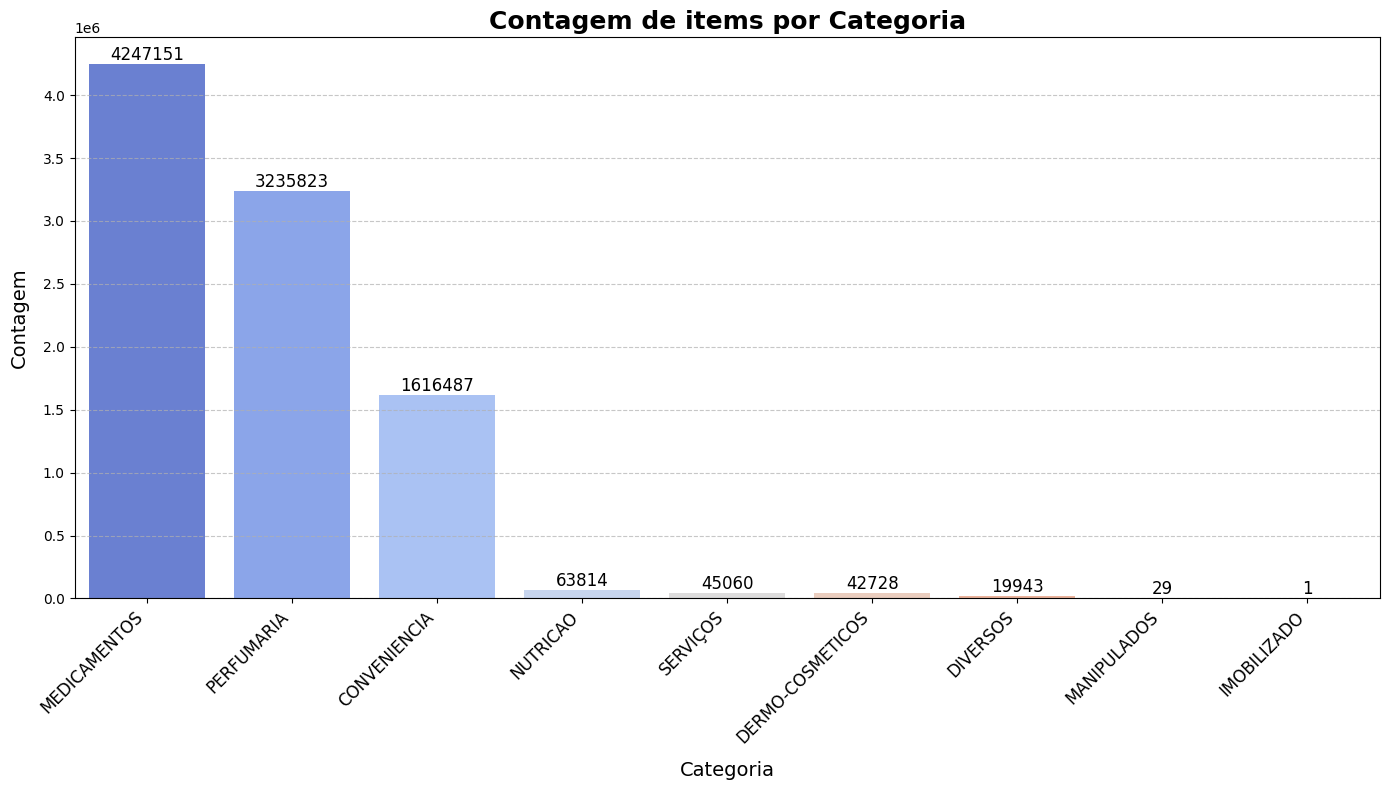

In [39]:
cat_sku_count = df['CATEGORIA_SKU'].value_counts()

plt.figure(figsize=(14, 8))

sns.barplot(x=cat_sku_count.index, y=cat_sku_count.values, palette='coolwarm')

plt.title('Contagem de items por Categoria', fontsize=18, weight='bold')
plt.xlabel('Categoria', fontsize=14, labelpad=10)
plt.ylabel('Contagem', fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(cat_sku_count.values):
    plt.text(index, value + 1, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Maiores Unidades em uma venda

C:\Users\Joao_vitor_Abitante\AppData\Local\Temp\ipykernel_6088\3052939155.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




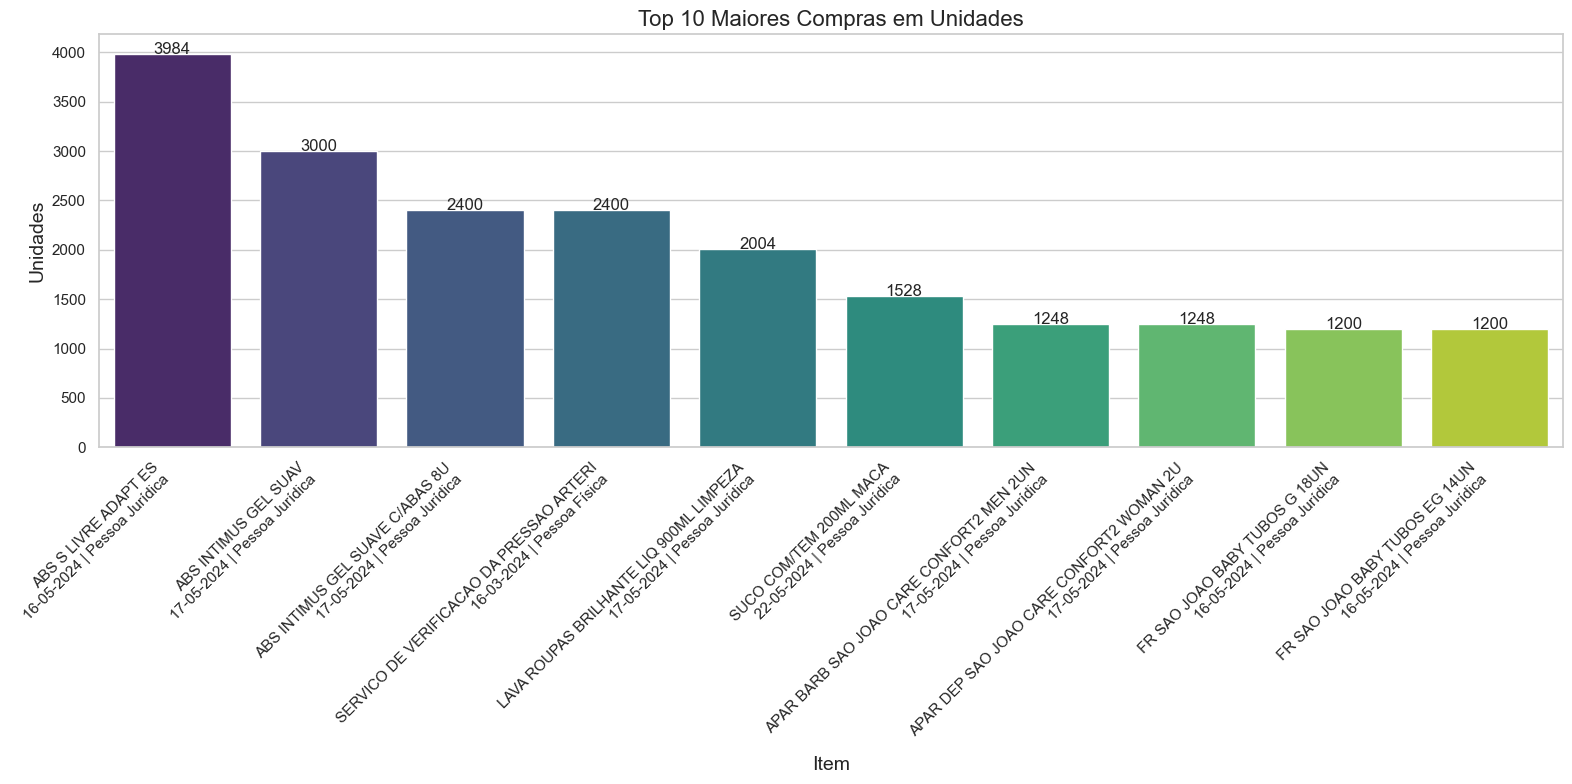

In [56]:
top_10_unidades = df.nlargest(10, 'UNIDADES')

top_10_unidades['Date'] = pd.to_datetime(top_10_unidades['DATA_CUPOM']).dt.strftime('%d-%m-%Y')
top_10_unidades['Item_Label'] = top_10_unidades['SKU'] + '\n' + top_10_unidades['Date'] + ' | ' + top_10_unidades['CLIENTE_FISICO_JURIDICO']

plt.figure(figsize=(16, 8))
sns.barplot(x='Item_Label', y='UNIDADES', data=top_10_unidades, palette='viridis')

plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_unidades['UNIDADES']):
    plt.text(index, value + 0.5, f'{value:.0f}', ha='center', fontsize=12)

plt.title('Top 10 Maiores Compras em Unidades', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Unidades', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [31]:
enchentes_data = df[df['DATA_CUPOM'].dt.month == 5]


In [33]:
enchentes_data.UNIDADES.value_counts().sort_index().tail(10)

UNIDADES
600.0     5
800.0     1
1000.0    3
1200.0    8
1248.0    2
1528.0    1
2004.0    1
2400.0    1
3000.0    1
3984.0    1
Name: count, dtype: int64

### A maioria dessas grades quantidades foram compradas durante a enchente 

C:\Users\Joao_vitor_Abitante\AppData\Local\Temp\ipykernel_18312\2811968251.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UNIDADES', y='Item_Label', data=top_10_unidades_enchentes, palette='viridis')


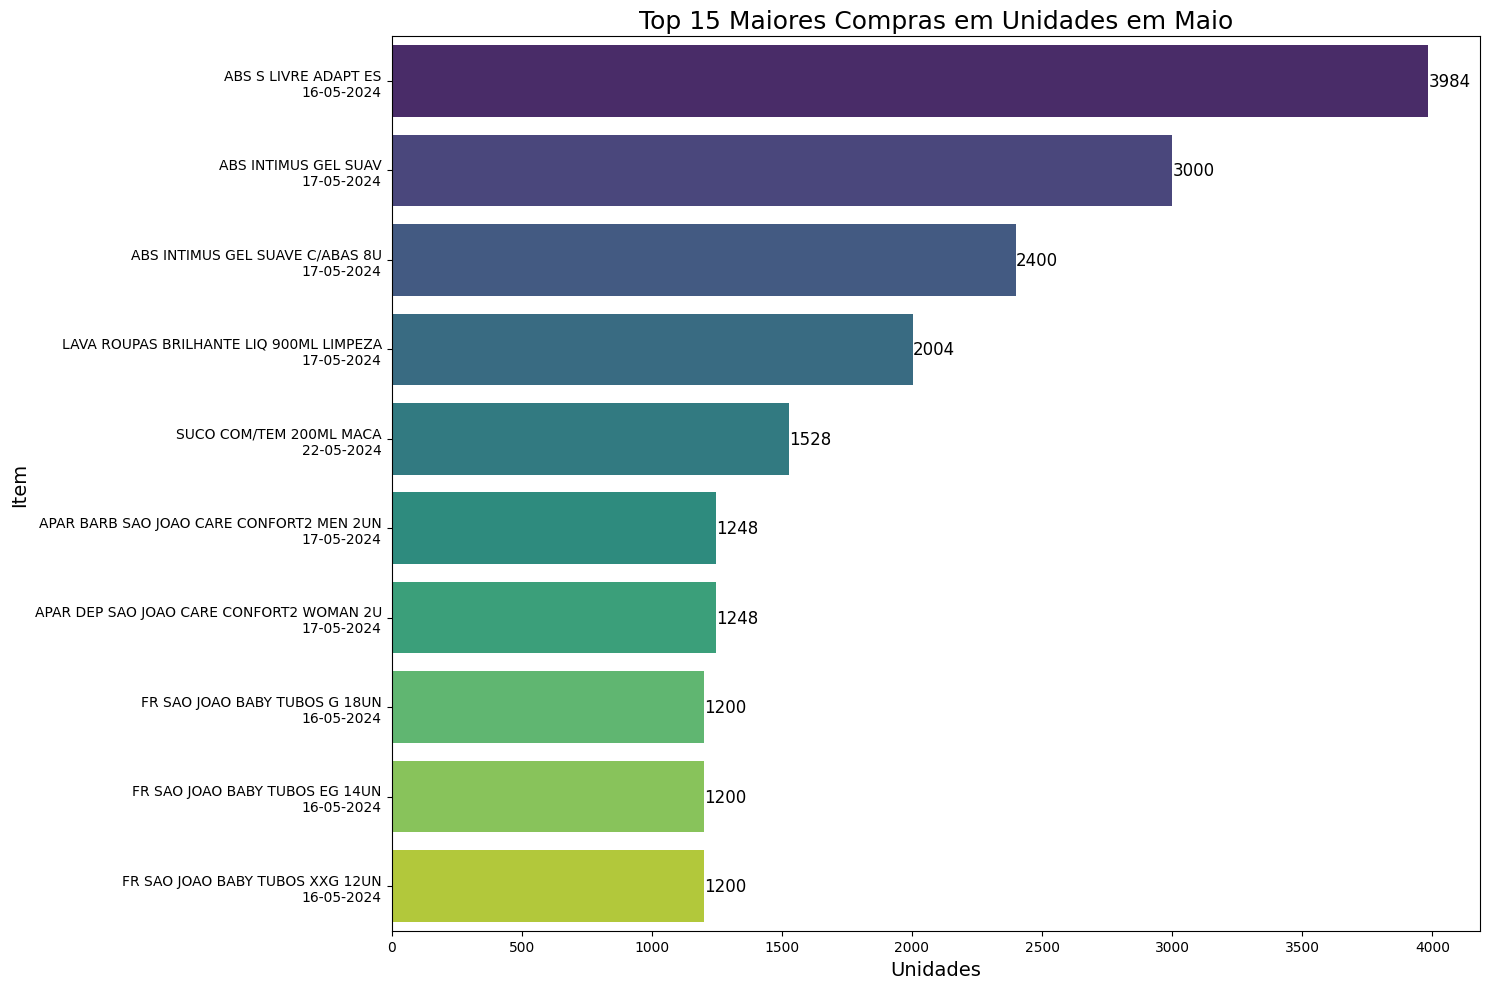

In [30]:
top_10_unidades_enchentes = df[df['DATA_CUPOM'].dt.month == 5].nlargest(10, 'UNIDADES')

top_10_unidades_enchentes['Date'] = pd.to_datetime(top_10_unidades_enchentes['DATA_CUPOM']).dt.strftime('%d-%m-%Y')
top_10_unidades_enchentes['Item_Label'] = top_10_unidades_enchentes['SKU'] + '\n' + top_10_unidades_enchentes['Date'] 

plt.figure(figsize=(15, 10))
sns.barplot(x='UNIDADES', y='Item_Label', data=top_10_unidades_enchentes, palette='viridis')

for index, value in enumerate(top_10_unidades_enchentes['UNIDADES']):
    plt.text(value + 0.5, index, f'{value:.0f}', va='center', fontsize=12)

plt.title('Top 15 Maiores Compras em Unidades em Maio', fontsize=18)
plt.xlabel('Unidades', fontsize=14)
plt.ylabel('Item', fontsize=14)


plt.tight_layout()
plt.show()

# Total Líquido ao Longo dos Dias Durante os Meses

C:\Users\Joao_vitor_Abitante\AppData\Local\Temp\ipykernel_6088\1512860332.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Joao_vitor_Abitante\AppData\Local\Temp\ipykernel_6088\1512860332.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Joao_vitor_Abitante\AppData\Local\Temp\ipykernel_6088\1512860332.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




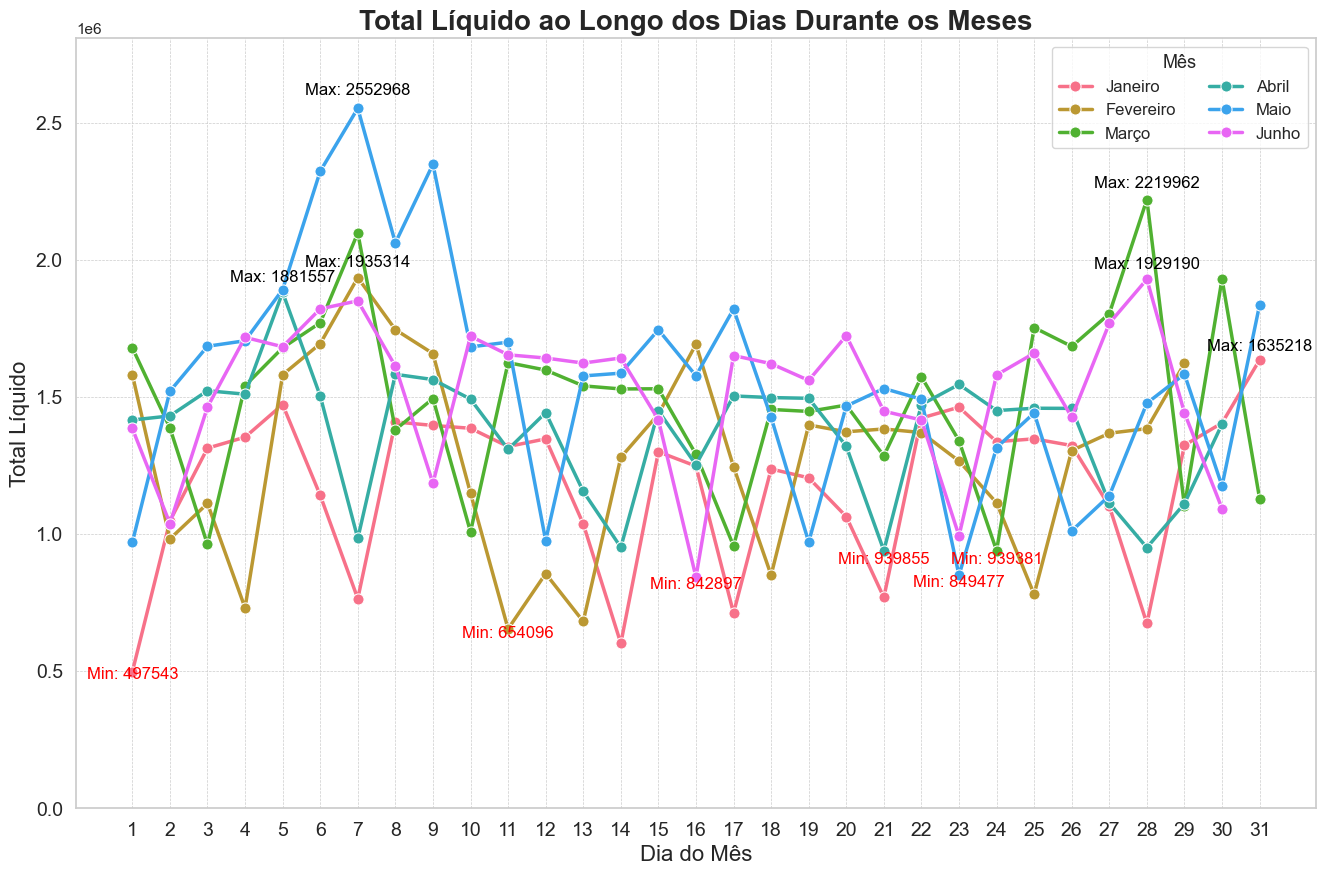

In [16]:
df_time = df[['DATA_CUPOM', 'TOTAL_LIQUIDO']]
df_time['Day'] = df_time['DATA_CUPOM'].dt.day
df_time['Month'] = df_time["DATA_CUPOM"].dt.month

df_agg = df_time.groupby(['Month', 'Day'])['TOTAL_LIQUIDO'].sum().reset_index()

# Renomeando os meses para melhor legibilidade
month_names = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
               7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
df_agg['Month'] = df_agg['Month'].map(month_names)

# Estilo do gráfico
sns.set(style="whitegrid")

# Criação do gráfico de linhas com melhorias
plt.figure(figsize=(16, 10))

# Paleta de cores simplificada
palette = sns.color_palette("husl", len(df_agg['Month'].unique()))

sns.lineplot(
    x='Day', 
    y='TOTAL_LIQUIDO', 
    hue='Month', 
    data=df_agg, 
    palette=palette, 
    marker='o', 
    linewidth=2.5,
    markersize=8,
    ci=None
)

# Adicionando anotações para pontos chave (e.g., valor máximo e mínimo por mês)
for month in df_agg['Month'].unique():
    month_data = df_agg[df_agg['Month'] == month]
    max_day = month_data.loc[month_data['TOTAL_LIQUIDO'].idxmax()]
    min_day = month_data.loc[month_data['TOTAL_LIQUIDO'].idxmin()]
    
    plt.text(max_day['Day'], max_day['TOTAL_LIQUIDO'] + 0.02 * max_day['TOTAL_LIQUIDO'], 
             f"Max: {max_day['TOTAL_LIQUIDO']:.0f}", 
             horizontalalignment='center', fontsize=12, color='black')
    
    plt.text(min_day['Day'], min_day['TOTAL_LIQUIDO'] - 0.05 * min_day['TOTAL_LIQUIDO'], 
             f"Min: {min_day['TOTAL_LIQUIDO']:.0f}", 
             horizontalalignment='center', fontsize=12, color='red')

# Melhorias nos títulos e rótulos
plt.title('Total Líquido ao Longo dos Dias Durante os Meses', fontsize=20, fontweight='bold')
plt.xlabel('Dia do Mês', fontsize=16)
plt.ylabel('Total Líquido', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mostrar todos os dias no eixo X
plt.xticks(ticks=range(1, 32), labels=range(1, 32), rotation=0)

plt.legend(title='Mês', title_fontsize='13', fontsize='12', loc='upper right', ncol=2)

plt.ylim(0, df_agg['TOTAL_LIQUIDO'].max() * 1.1)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostrar o gráfico
plt.show()

# Datas estranhas

In [41]:
out_of_bounds = df.loc[pd.to_datetime(df['DTNASCIMENTO_CLIENTE'], errors='coerce').isna()]
out_of_bounds.DTNASCIMENTO_CLIENTE.value_counts()

DTNASCIMENTO_CLIENTE
1111-11-11    59
1598-01-20     2
1198-04-17     2
Name: count, dtype: int64

# Média de gasto por grupo

In [1]:
df_valid = df[pd.to_datetime(df['DTNASCIMENTO_CLIENTE'], errors='coerce').notna()].copy()

df_valid['Idade'] = 2024 - pd.to_datetime(df_valid['DTNASCIMENTO_CLIENTE']).dt.year

faixas_etarias = pd.cut(df_valid['Idade'], bins=[18, 25, 35, 45, 60, 100])
gastos_por_faixa_etaria = df_valid.groupby(faixas_etarias, observed=True).agg({
    'TOTAL_LIQUIDO': 'mean',
    'COD_CUPOM': 'count'
}).rename(columns={'TOTAL_LIQUIDO': 'Gasto_Medio_Por_Compra', 'COD_CUPOM': 'Total_Compras'})

rotulos_faixas_etarias = ['18-24', '25-34', '35-44', '45-59', '60+']

plt.figure(figsize=(10, 6))
sns.barplot(
    x=rotulos_faixas_etarias,
    y=gastos_por_faixa_etaria['Gasto_Medio_Por_Compra'],
    hue=rotulos_faixas_etarias,  
    palette='Blues_d',
    dodge=False
)
plt.legend([], [], frameon=False)  
plt.title('Gasto Médio por Faixa Etária', fontsize=16, pad=20)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Gasto Médio', fontsize=14)
plt.xticks(rotation=0)
plt.show()


NameError: name 'df' is not defined

# Best stores

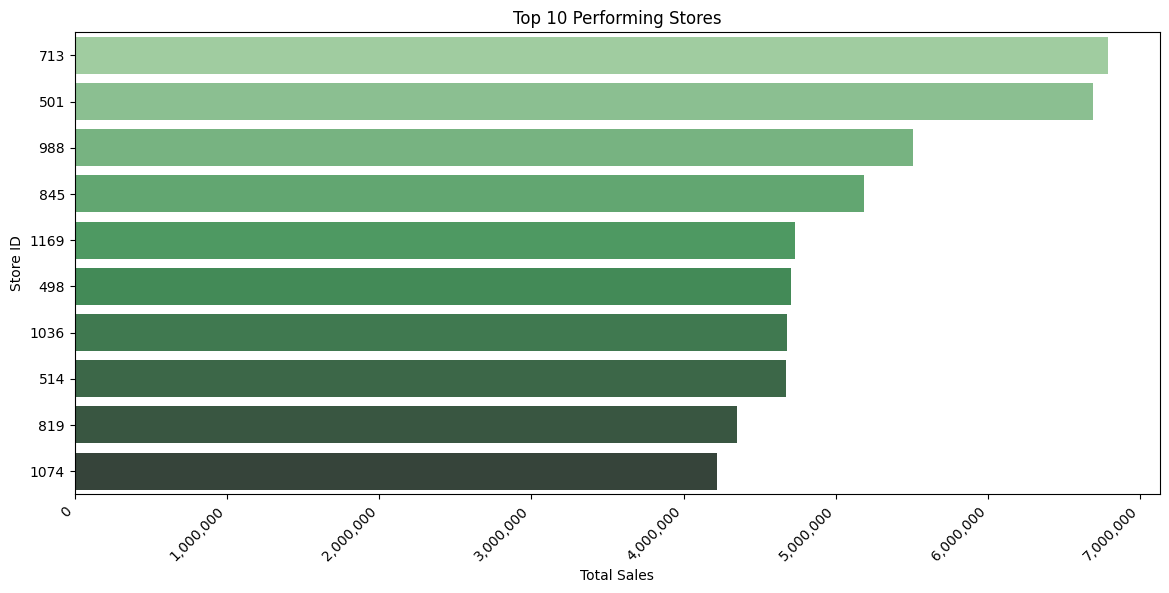

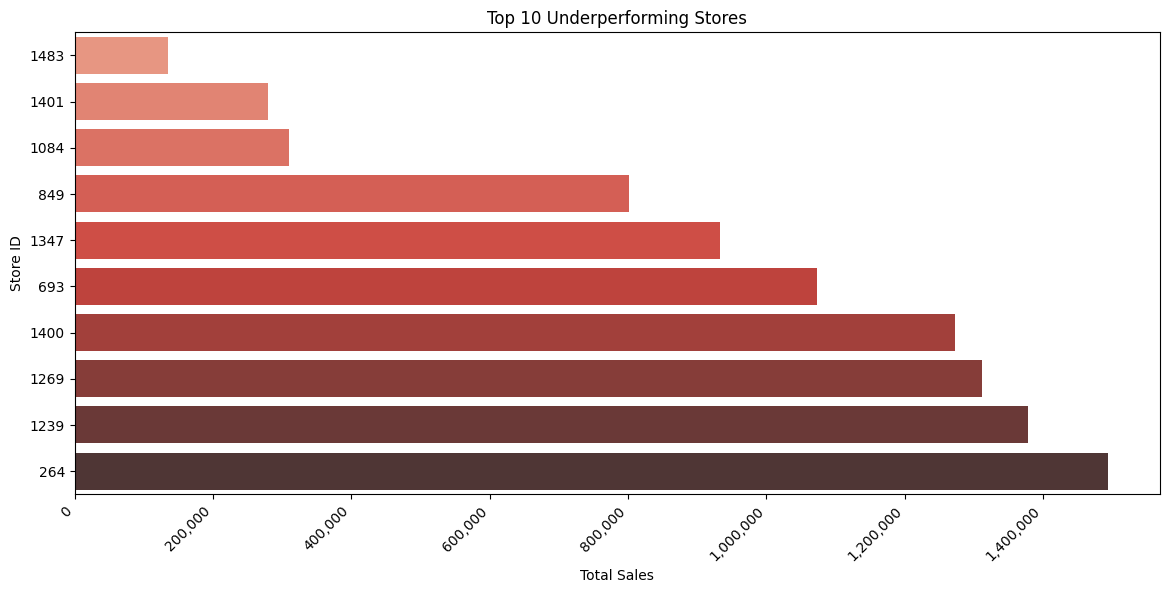

In [32]:
store_performance = df.groupby(['COD_LOJA']).agg({
    'TOTAL_LIQUIDO': 'sum',
    'COD_CUPOM': 'count'
}).rename(columns={'TOTAL_LIQUIDO': 'Total_Sales', 'COD_CUPOM': 'Number_of_Transactions'})


top_performing_stores = store_performance.sort_values(by='Total_Sales', ascending=False).head(10)
underperforming_stores = store_performance.sort_values(by='Total_Sales').head(10)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=top_performing_stores['Total_Sales'],
    y=top_performing_stores.index.astype(str),
    hue=top_performing_stores.index.astype(str),  
    palette='Greens_d',
    dodge=False
)
plt.xlabel('Total Sales')
plt.ylabel('Store ID')
plt.title('Top 10 Performing Stores')
plt.legend([], [], frameon=False)  
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}')) 
plt.show()


plt.figure(figsize=(14, 6))
sns.barplot(
    x=underperforming_stores['Total_Sales'],
    y=underperforming_stores.index.astype(str),
    hue=underperforming_stores.index.astype(str),  
    palette='Reds_d',
    dodge=False
)
plt.xlabel('Total Sales')
plt.ylabel('Store ID')
plt.title('Top 10 Underperforming Stores')
plt.legend([], [], frameon=False)  # Disable the legend
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))  # Format numbers with commas
plt.show()

# Sales from Hour and Day 

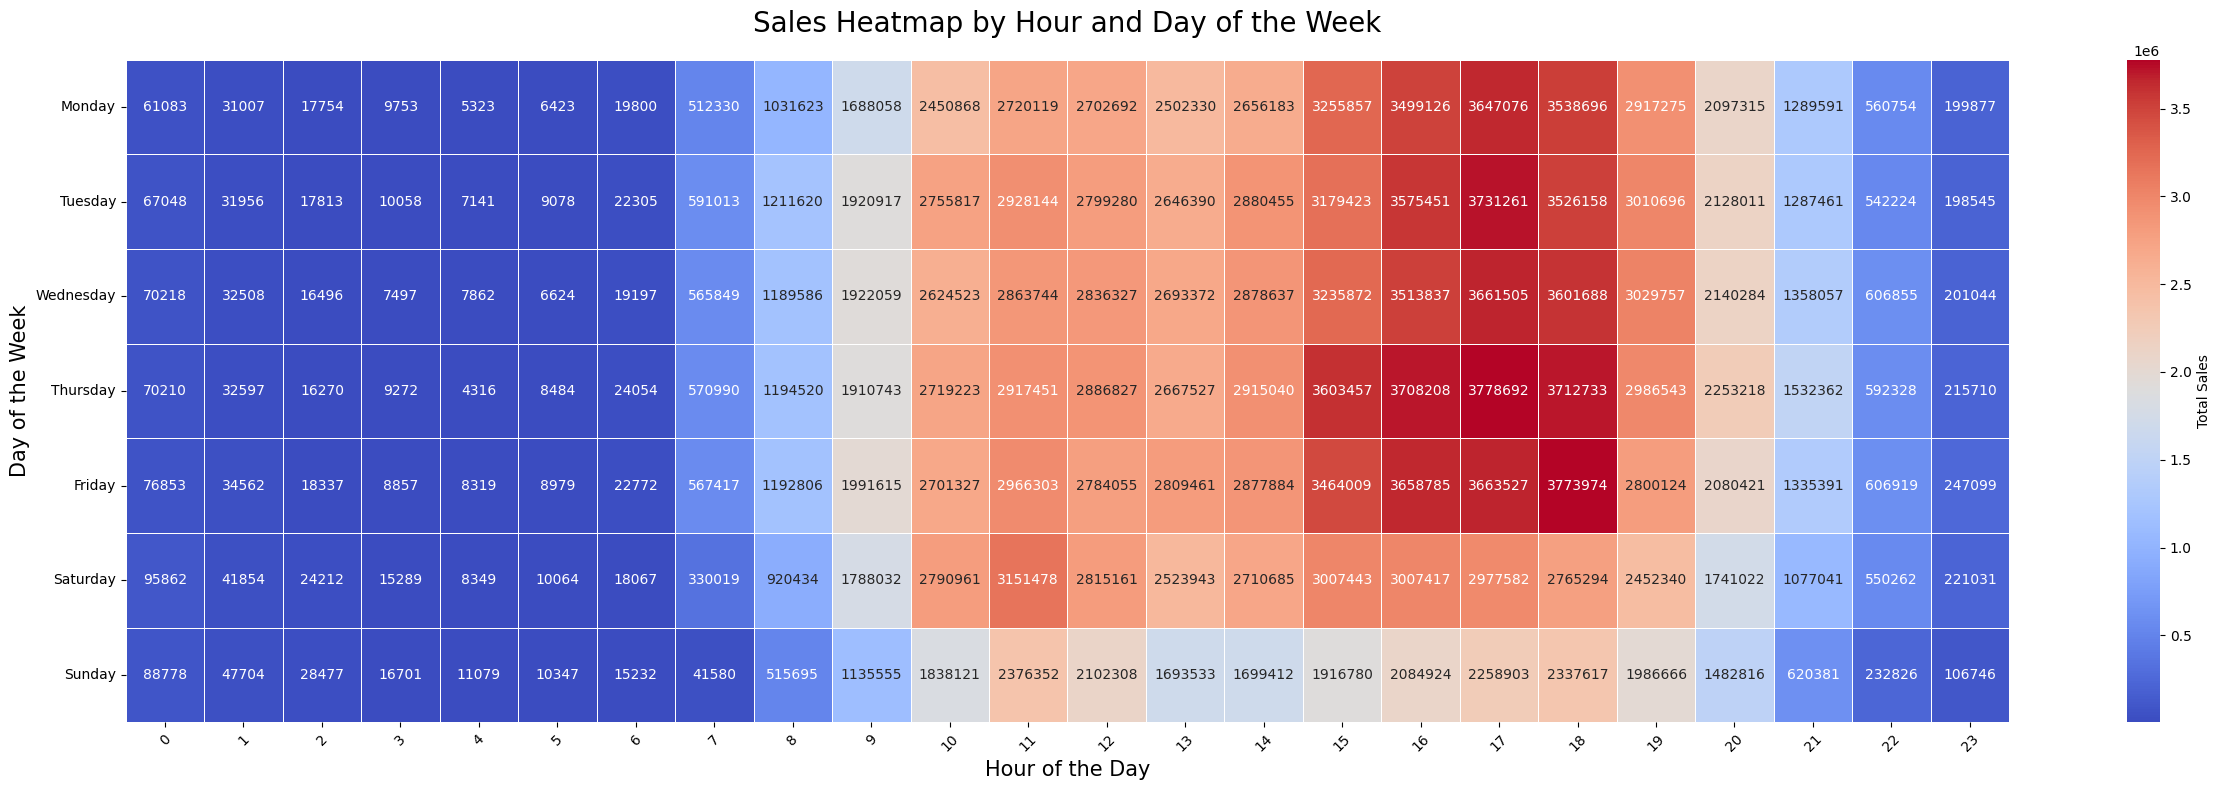

In [83]:
# 2. Peak Sales Times
# Extracting hour and day of the week from 'DATA_CUPOM'
df_peak_sales = df.copy()
df_peak_sales['Hour'] = df['DATA_CUPOM'].dt.hour
df_peak_sales['Day_of_Week'] = df['DATA_CUPOM'].dt.day_name()

# Group by hour and day of the week to find peak times
peak_sales_times = df_peak_sales.groupby(['Day_of_Week', 'Hour']).agg({
    'TOTAL_LIQUIDO': 'sum'
}).rename(columns={'TOTAL_LIQUIDO': 'Total_Sales'}).reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_sales_pivot = peak_sales_times.pivot(index='Day_of_Week', columns='Hour', values='Total_Sales')
peak_sales_pivot = peak_sales_pivot.reindex(days_order)

# Plotting heatmap of peak sales times
plt.figure(figsize=(25, 8))
sns.heatmap(peak_sales_pivot, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total Sales'})
plt.title('Sales Heatmap by Hour and Day of the Week', fontsize=20, pad=20)
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Day of the Week', fontsize=15)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top Items Sold

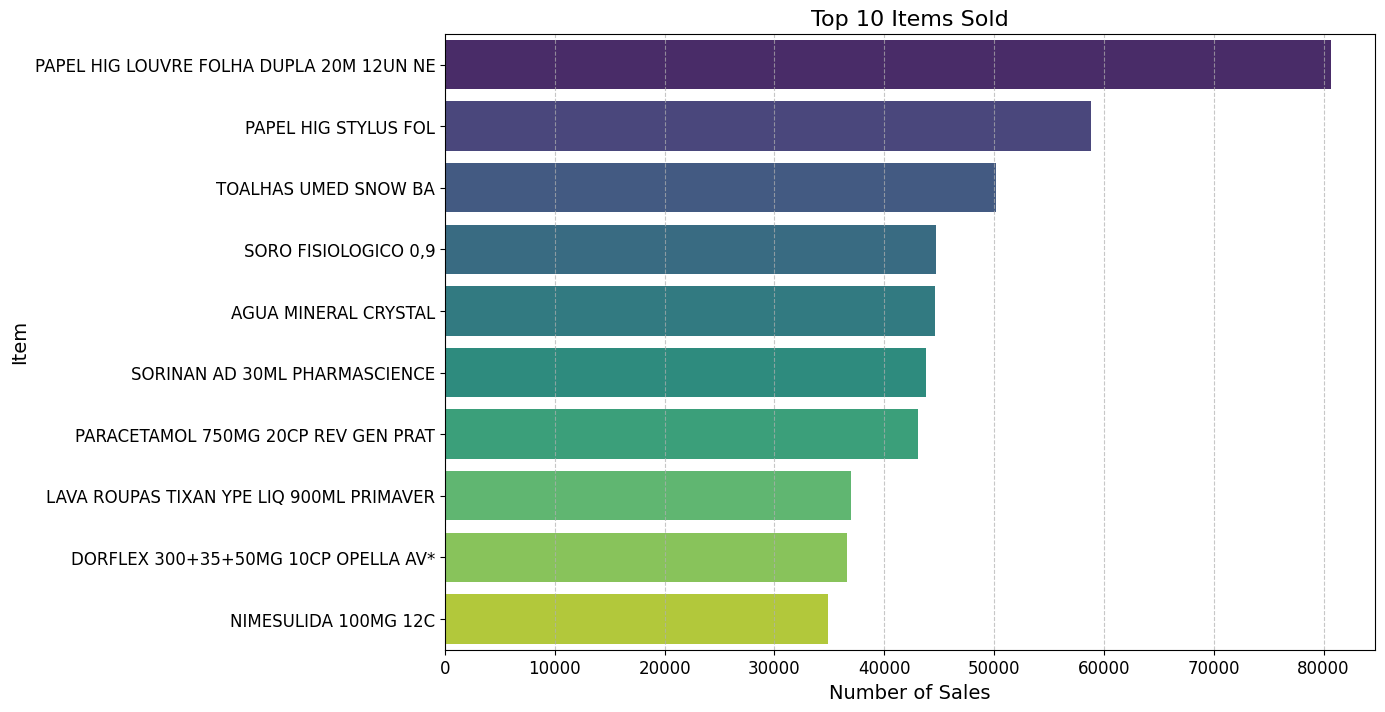

In [51]:
sku_counts = df['SKU'].value_counts().reset_index()
sku_counts.columns = ['SKU', 'Count']

# Filter to show only the top 10 items
top_sku_counts = sku_counts.head(10)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='SKU', data=top_sku_counts, palette='viridis', hue='SKU', dodge=False, legend=False)
plt.title('Top 10 Items Sold', fontsize=16)
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

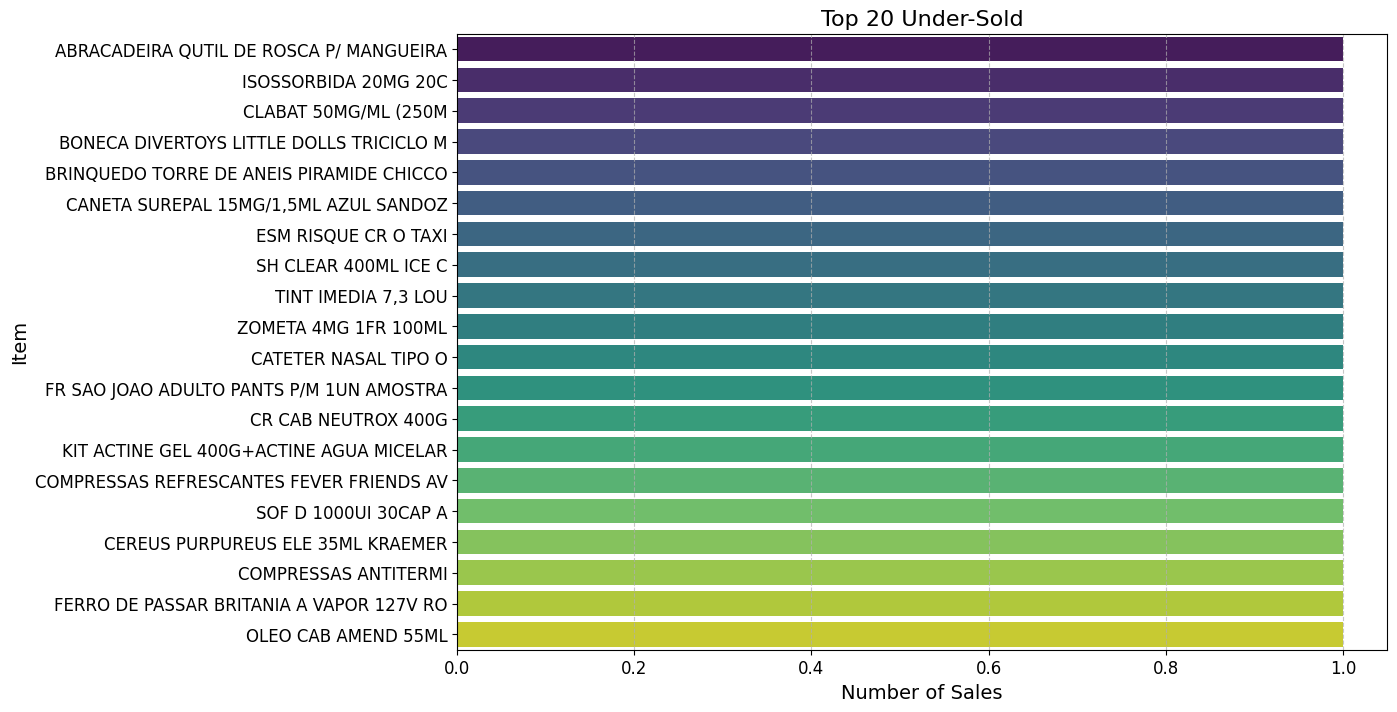

In [65]:
tail_sku_counts = sku_counts.tail(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='SKU', data=tail_sku_counts, palette='viridis', hue='SKU', dodge=False, legend=False)
plt.title('Top 20 Under-Sold', fontsize=16)
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [71]:
only_one_sale = sku_counts[sku_counts["Count"] == 1]
print(f'There are {only_one_sale.shape[0]} itens that were sold only once.')

There are 984 itens that were sold only once.
